# <b>Análise Exploratória</b>

### Introdução 

O dataset que estamos trabalhando foram dados extraídos do site Airbnb

No processo de extração, coletemos os seguintes dados

> <b>Título</b>: Título do anuncio

> <b>Preço</b>: Preço por noite, em reais

> <b>Avaliação</b>: Nota de 1 a 5 

> <b>Bairro</b>: Localização

> <b>Imóvel</b>: Tipo de imóvel

> <b>Hóspedes</b>: Quantos hóspedes cabem

> <b>Camas</b>: Número de camas

> <b>Quartos</b>: Número de quartos

> <b>Banheiros</b>: Número de banheiros 

> <b>Cozinha</b>: Se tem cozinha ou não 

> <b>Wi-Fi</b>: Se tem Wi-Fi ou não

> <b>Piscina</b>: Se tem piscina ou não

Neste notebook, realizaremos uma análise exploratória desses dados

### Importando bibliotecas

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import re 

import warnings
warnings.filterwarnings('ignore')

sns.set()

### Pré-Descrição dos dados

In [2]:
data = pd.read_csv("dados_anuncios_airbnb_tratados.csv")

In [3]:
data.head()

,Título,Preço (R$),Avaliação,Bairro,Imóvel,Hóspedes,Camas,Quartos,Banheiros,Cozinha,Wi-Fi,Piscina
0,FLAT PARTICULAR NO MELIA - AV. IBIRAPUERA,110,4.90,Indianópolis,Flat inteiro,2,1,1,1,Tem,Tem,Tem
1,Studio novinho a 300 m metrô - Self check in,117,4.80,Consolacao,Apartamento inteiro,5,3,0,1,Tem,Tem,Tem
2,Studio encantador em São Paulo próximo ao metrô,110,4.87,Consolacao,Flat inteiro,2,1,1,1,Tem,Tem,Tem
3,Flat mobiliado ao lado do Hospital Sirio Libanês,80,4.61,Bela Vista,Flat inteiro,2,1,1,1,Tem,Tem,Não tem
4,Suíte moderna com cama de casal no Brooklin,54,4.89,Vila Olímpia,Quarto inteiro,2,1,1,1,Tem,Tem,Não tem


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Título      350 non-null    object 
 1   Preço (R$)  350 non-null    int64  
 2   Avaliação   297 non-null    float64
 3   Bairro      350 non-null    object 
 4   Imóvel      350 non-null    object 
 5   Hóspedes    350 non-null    int64  
 6   Camas       350 non-null    int64  
 7   Quartos     350 non-null    int64  
 8   Banheiros   350 non-null    int64  
 9   Cozinha     350 non-null    object 
 10  Wi-Fi       350 non-null    object 
 11  Piscina     350 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 32.9+ KB


In [5]:
# Vizualizando dados nulos
data.loc[data['Avaliação'].isnull(), :]

,Título,Preço (R$),Avaliação,Bairro,Imóvel,Hóspedes,Camas,Quartos,Banheiros,Cozinha,Wi-Fi,Piscina
7,Apto Jardins mobiliado Excelente localização,75,NaN,Paraíso,Apartamento inteiro,2,1,1,1,Tem,Tem,Não tem
19,Apartamento no Bom Retiro 5min da Rodoviária T...,43,NaN,Bom Retiro,Quarto inteiro,2,1,2,1,Tem,Tem,Não tem
27,APARTAMENTO 02-50M²- 10 MINUTOS DO AEROPORTO GRU,100,NaN,Vila Florida,Condomínio inteiro,4,2,1,1,Não tem,Tem,Não tem
28,La Residence Alamada Jau,91,NaN,Cerqueira César,Flat inteiro,2,1,1,1,Tem,Tem,Tem
44,Apartamento agradável e bem iluminado. V. Pompéia,111,NaN,Água Branca,Apartamento inteiro,2,1,1,1,Não tem,Tem,Tem
46,FIQUE PRÓXIMO AO PARQUE DO IBIRAPUERA,99,NaN,Vila Uberabinha,Quarto inteiro,2,1,1,1,Não tem,Tem,Não tem
48,#208 - Cyclinn Faria Lima Itaim,182,NaN,Itaim Bibi,Apartamento inteiro,4,3,1,1,Não tem,Tem,Tem
84,FLAT 104 MARAVILHOSO NOS JARDINS,135,NaN,Cerqueira César,Flat inteiro,2,1,1,1,Tem,Tem,Tem
93,Flat com serviços - Hosp. Sírio Libanês/Paulista,98,NaN,Bela Vista,Flat inteiro,2,3,1,1,Não tem,Tem,Tem
98,FIQUE PRÓXIMO AO PARQUE DO IBIRAPUERA,99,NaN,Vila Uberabinha,Quarto inteiro,2,1,1,1,Não tem,Tem,Não tem


In [6]:
len(data.loc[data['Avaliação'].isnull(), :])

53

Podemos observar que temos 53 valores nulls. Isso pode ter acontecido devido ao fato do anúncio ser recente e não ainda ter recebido avalições ou devido a algum erro no processo de extração.

In [7]:
data.columns

Index(['Título', 'Preço (R$)', 'Avaliação', 'Bairro', 'Imóvel', 'Hóspedes',
       'Camas', 'Quartos', 'Banheiros', 'Cozinha', 'Wi-Fi', 'Piscina'],
      dtype='object')

In [8]:
data[data.Bairro == "São Paulo"]

,Título,Preço (R$),Avaliação,Bairro,Imóvel,Hóspedes,Camas,Quartos,Banheiros,Cozinha,Wi-Fi,Piscina
110,Casa confortável e com privacidade em Santana!!,65,5.0,São Paulo,Quarto inteiro,2,1,1,2,Não tem,Tem,Não tem
125,Studio no 18° Andar,121,5.0,São Paulo,Apartamento inteiro,2,1,1,1,Tem,Tem,Tem


Por algum motivo, esses dois anúncios vieram com o bairro "São Paulo". Isso pode ter ocorrido devido a erro de extração ou erro dos usuários durante a publicação. Portanto, realizaremos um tratamento à eles.

In [9]:
data.iloc[110,3] = 'Santana'
data.drop(index = 125, inplace = True)
data.reset_index();

In [10]:
data[data.Bairro == "São Paulo"]

,Título,Preço (R$),Avaliação,Bairro,Imóvel,Hóspedes,Camas,Quartos,Banheiros,Cozinha,Wi-Fi,Piscina


Pronto, agora podemos seguir com as análises gráficas.

Com o método `describe()`, podemos observar algumas medidas descritivas do nosso dataset.

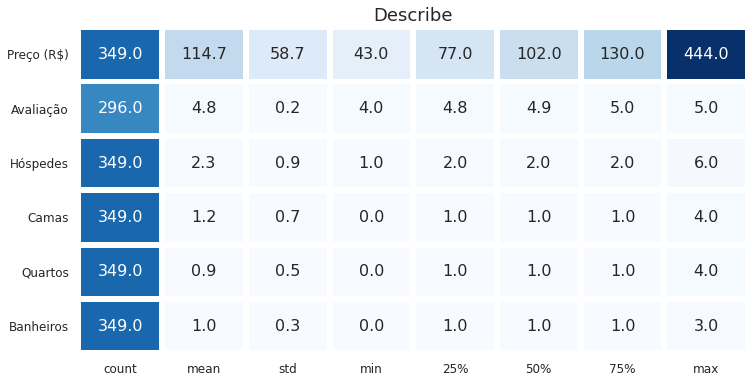

In [11]:
plt.figure(figsize = (12,6))
ax = sns.heatmap(data.describe().T, 
                 cmap = 'Blues', 
                annot = True, fmt = '.1f', 
                linewidths = 5, cbar = False, 
                annot_kws={"size": 16})
ax.set_title('Describe', fontsize = 18)
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0);

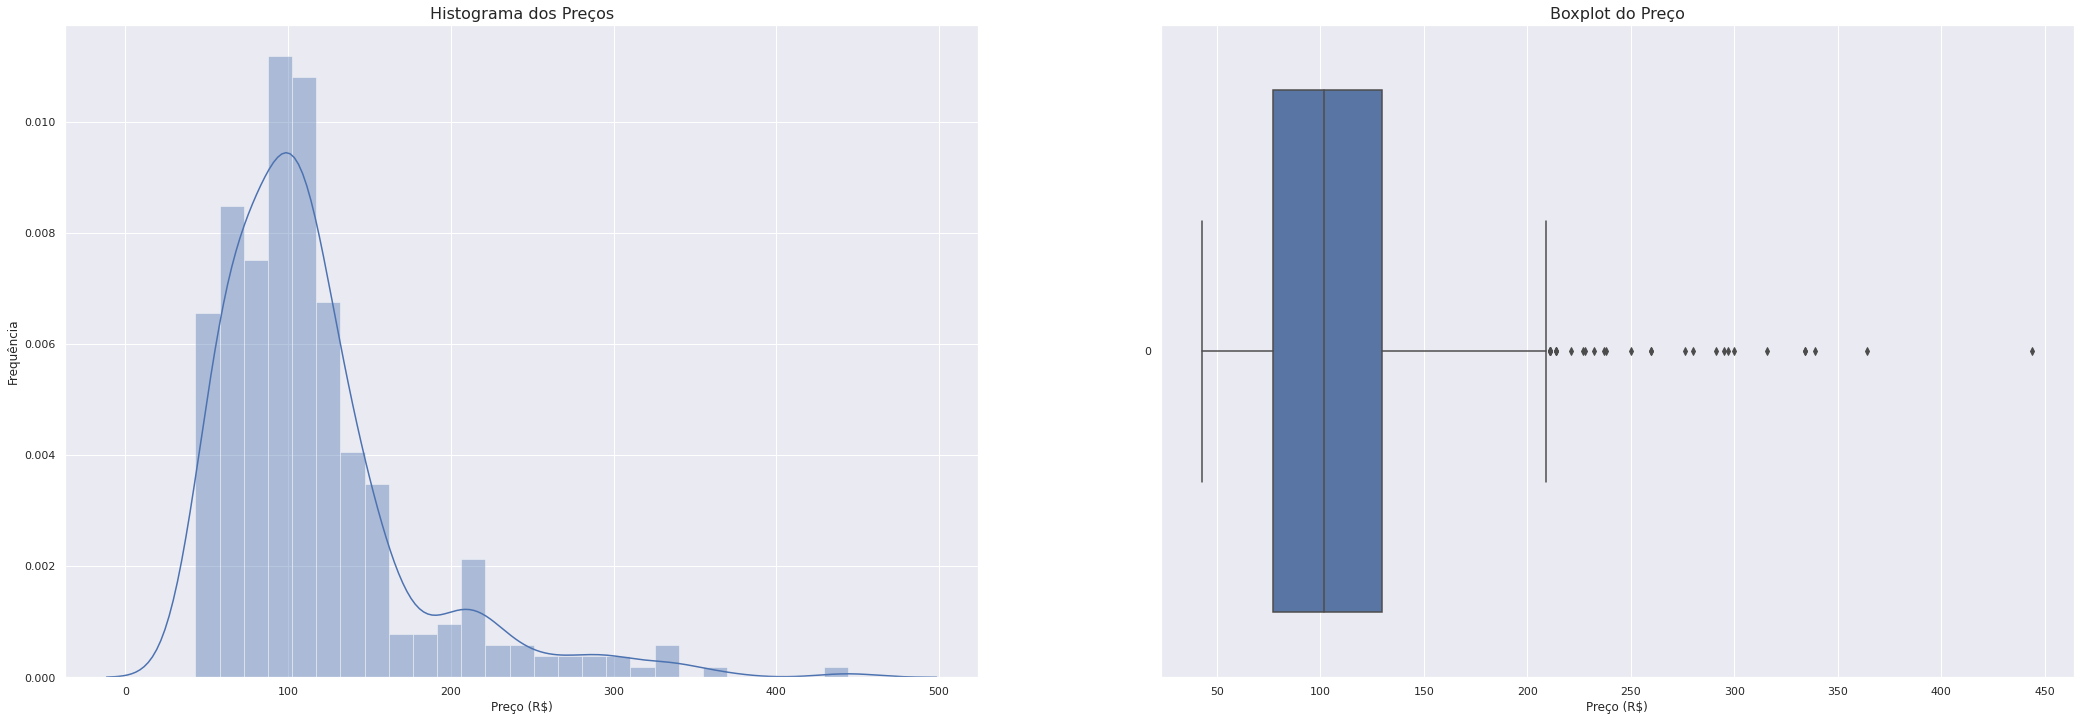

In [12]:
plt.figure(figsize=(36,12))

plt.subplot(1,2,1)
ax1 = sns.distplot(data['Preço (R$)'])
ax1.set_title('Histograma dos Preços', fontsize = 16)
ax1.set_ylabel('Frequência')
ax1.set_xlabel('Preço (R$)')

plt.subplot(1,2,2)
ax2 = sns.boxplot(data = data['Preço (R$)'], orient='h')
ax2.set_title('Boxplot do Preço',fontsize = 16)
ax2.set_xlabel('Preço (R$)')

plt.show()

Observamos que a variável `Preços` possi um compartamento assimétrico a direita, o que faz sentido, já que é normal possuir mais anúncios baratos e acessíveis para a maioria dos usuários, tendo menos anúncios caros, reservados àqueles que queiram pagar em um lugar mais luxuoso. 

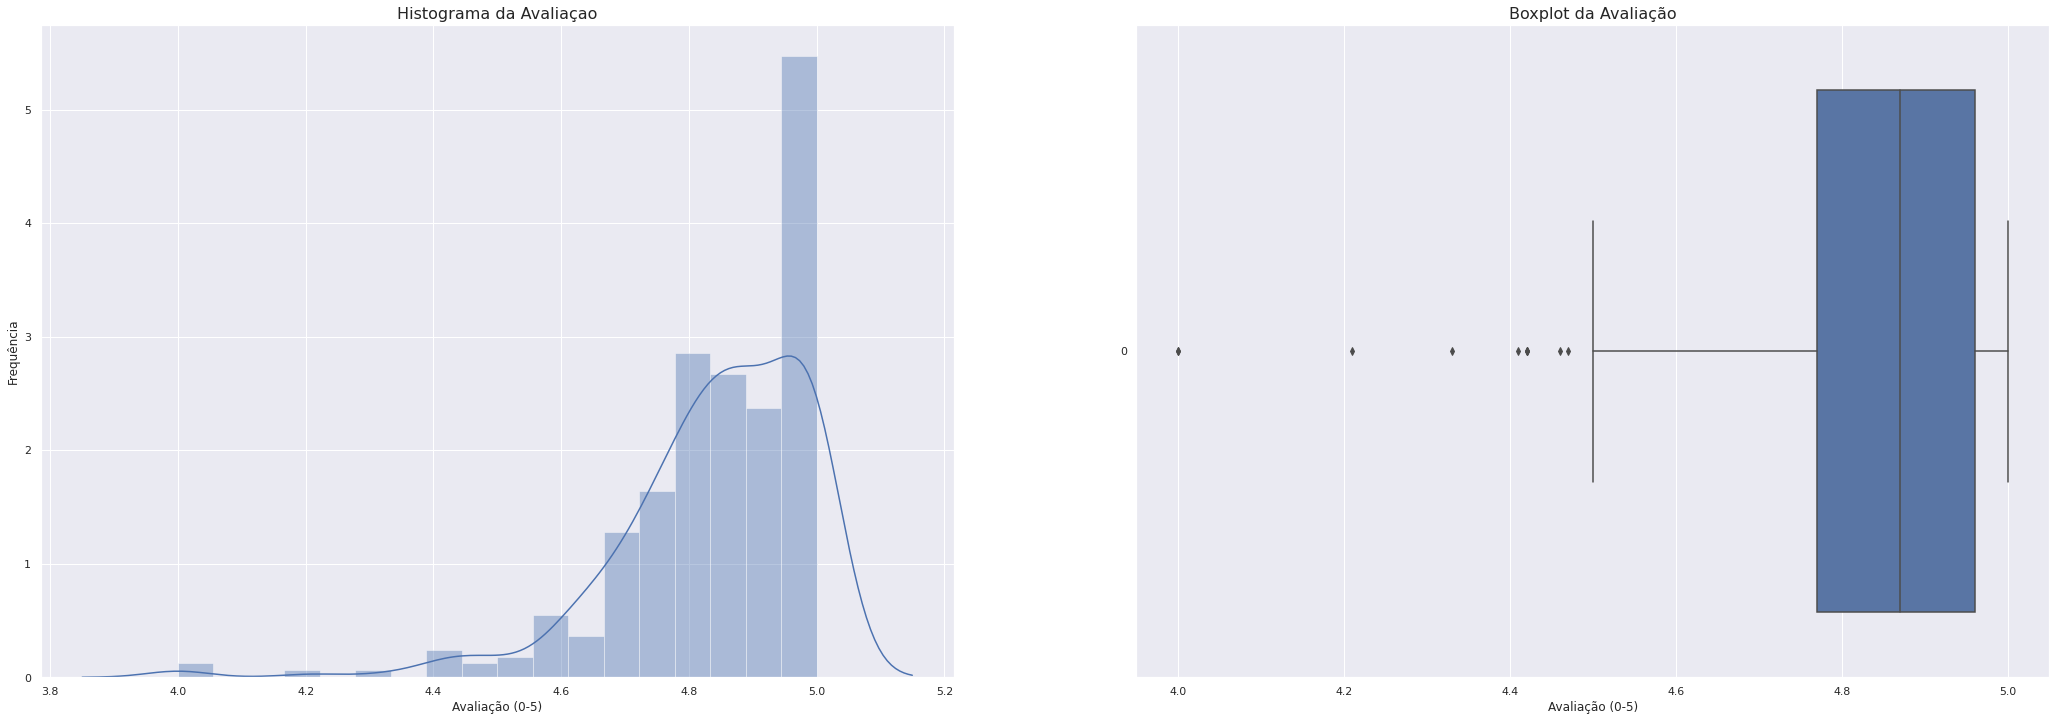

In [13]:
plt.figure(figsize=(36,12))

plt.subplot(1,2,1)
ax1 = sns.distplot(data['Avaliação'])
ax1.set_title('Histograma da Avaliaçao', fontsize = 16)
ax1.set_ylabel('Frequência')
ax1.set_xlabel('Avaliação (0-5)')

plt.subplot(1,2,2)
ax2 = sns.boxplot(data = data['Avaliação'], orient='h')
ax2.set_title('Boxplot da Avaliação', fontsize = 16)
ax2.set_xlabel('Avaliação (0-5)');

plt.show()

Já no caso de `Avaliação`, ele apresenta uma assimetria à esquerda. Isso mostra que a maioria dos anúcios possuem, em média, boas avalições. Observando o boxplot a direita, podemos ver que acima dos 25% das avalições possuem notas acima de 4.8.

In [14]:
group_bairro_preco = data.groupby(by = 'Bairro').mean()['Preço (R$)'].sort_values(ascending = False)
group_bairro_aval = data.groupby(by = 'Bairro').mean()['Avaliação'].dropna().sort_values(ascending = False)

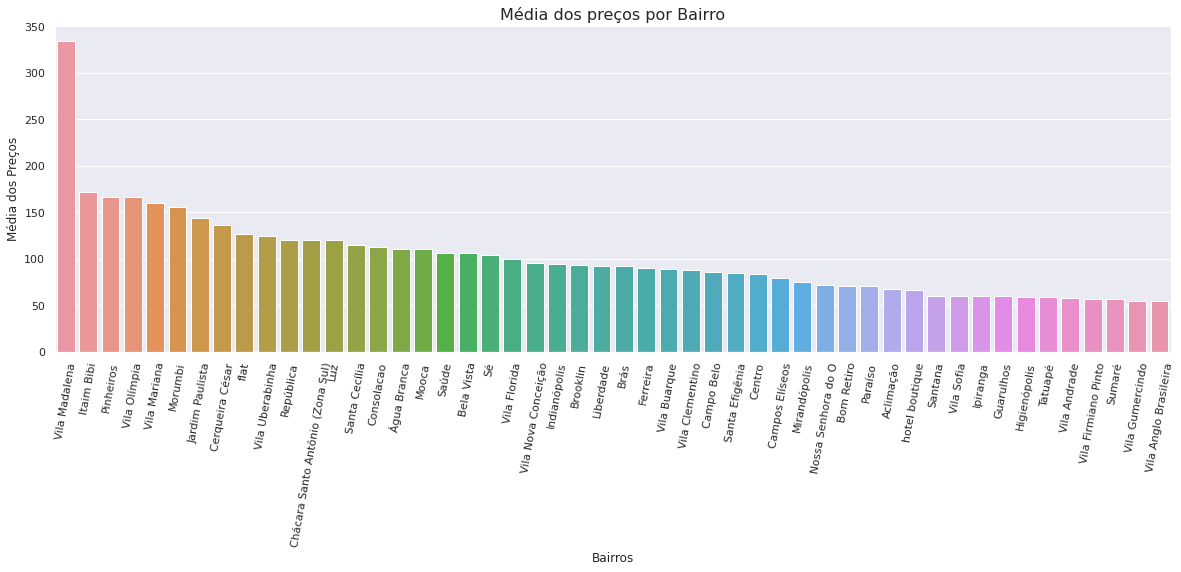

In [15]:
ax = sns.barplot(x = group_bairro_preco.index, y = group_bairro_preco.values)
ax.set_title('Média dos preços por Bairro', fontsize = 16)
ax.set_ylabel('Média dos Preços')
ax.set_xlabel('Bairros')
ax.figure.set_size_inches(20,6)
plt.xticks(rotation=80);

Agrupamos os dados a partir da variável `Bairros`. Em seguida, calculamos o preço médio para cada bairro, e podemos observar que a *Vila Madalena* possui os anúncios mais caros, seguido do *Itaim Bibi* e *Pinheiros*.

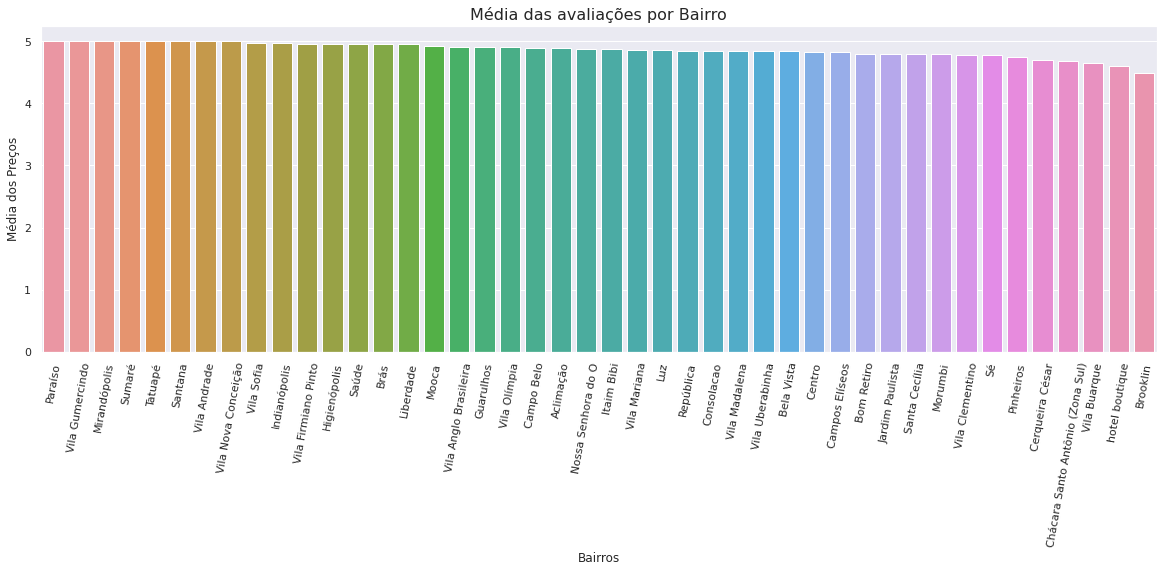

In [16]:
ax = sns.barplot(x = group_bairro_aval.index, y = group_bairro_aval.values)
ax.set_title('Média das avaliações por Bairro', fontsize = 16)
ax.set_ylabel('Média dos Preços')
ax.set_xlabel('Bairros')
ax.figure.set_size_inches(20,6)
plt.xticks(rotation=80);

Agora, calculamos a média de `Avaliação` para cada `Bairros`. Podemos observar os anúncios localizados no bairro da *Paraíso* possuem as melhores avaliações.  

In [17]:
_data = data.copy()
_data.dropna(inplace = True)
bins = [0,1,2,3,4,5]
avalicao_cut = pd.cut(x = _data['Avaliação'], bins = bins)
_data["faixas avaliacao"] = avalicao_cut
grupo_avals_preco = _data.groupby(by = "faixas avaliacao")

In [18]:
avalicao_cut.unique()

[(4, 5], (3, 4]]
Categories (2, interval[int64]): [(3, 4] < (4, 5]]

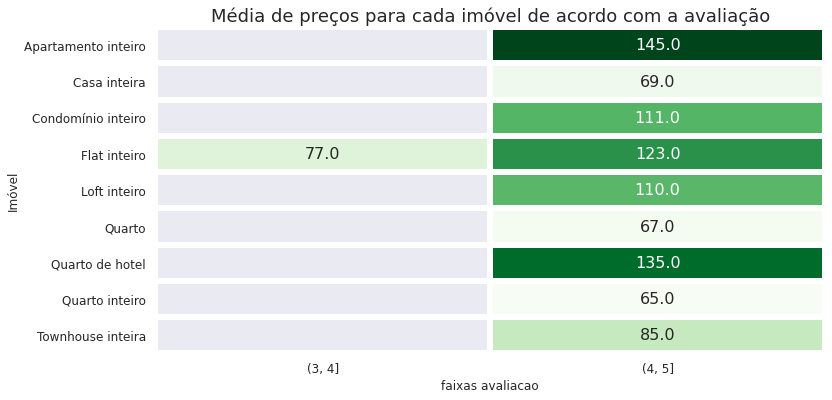

In [19]:
tab = pd.crosstab(index = _data["Imóvel"],
                  columns = _data["faixas avaliacao"], 
                  dropna = True,
                  values = _data['Preço (R$)'],
                  aggfunc = 'mean').round(0)

plt.figure(figsize = (12,6))
ax = sns.heatmap(tab, 
                 cmap = 'Greens', 
                annot = True, fmt = '.1f', 
                linewidths = 5, cbar = False, 
                annot_kws={"size": 16})
ax.set_title('Média de preços para cada imóvel de acordo com a avaliação', fontsize = 18)
plt.xticks(size = 12, rotation = 0)
plt.yticks(size = 12, rotation = 0);

Separando a variável `Avaliação` em faixas, calculamos o `Preço` médio para cada tipo de `Imóvel`. Podemos observar que os imóveis do tipo *Apartamento inteiro*, com avaliações entre 4 e 5 possuem os maiores preços. 

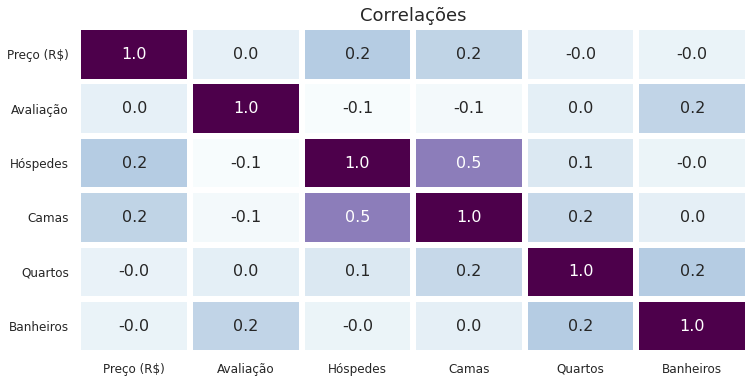

In [20]:
plt.figure(figsize = (12,6))
ax = sns.heatmap(data.corr(), 
                 cmap = 'BuPu', 
                annot = True, fmt = '.1f', 
                linewidths = 5, cbar = False, 
                annot_kws={"size": 16})
ax.set_title('Correlações', fontsize = 18)
plt.xticks(size = 12, rotation = 0)
plt.yticks(size = 12, rotation = 0);

Aqui realizamos um heatmap com as correlações entre cada variável. 